In [1]:
import csv
import pandas as pd
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
from pathlib import Path
import folium

In [2]:
ufo_df = pd.read_csv('UFO_csv.csv', encoding='latin-1')
ufo_df.head(66)

,Date,Time,Country,City,State,Shape,Summary,lat,lng,Unnamed: 9
0,12/21/2016,19:15,USA,Waynesboro,VA,Sphere,Bright round object hovering in sky.,38.065229,-78.905888,NaN
1,12/21/2016,0:00,USA,Louisville,KY,Unknown,Multiple craft ascending from north of Shelbyv...,38.254238,-85.759407,NaN
2,12/20/2016,22:30,USA,Santa Rosa,CA,Sphere,Bright orange planet-like object sighted near ...,38.440467,-122.714431,NaN
3,12/20/2016,19:00,USA,Fresno,CA,Circle,Twelve orange globes in formation over Fresno,36.729529,-119.708861,NaN
4,12/19/2016,21:53,USA,Reymert,AZ,Circle,"While camping in the Cottonwood canyon Rd., al...",33.229779,-111.209290,NaN
...,...,...,...,...,...,...,...,...,...,...
61,12/13/2016,19:00,USA,Dubuque,IA,Light,Stopped at the light at the intersection of Hi...,42.500622,-90.664797,NaN
62,12/13/2016,18:30,USA,St. Johns,FL,Chevron,We were walking across parking lot to restaura...,29.903228,-81.414547,NaN
63,12/13/2016,5:35,USA,West Des Moines,IA,Light,Large ball of light falling to earth at a incr...,41.564534,-93.759528,NaN
64,12/13/2016,3:37,USA,Pasadena,CA,Unknown,Observed a pair of red light N of Pasadena no ...,34.147645,-118.144478,NaN


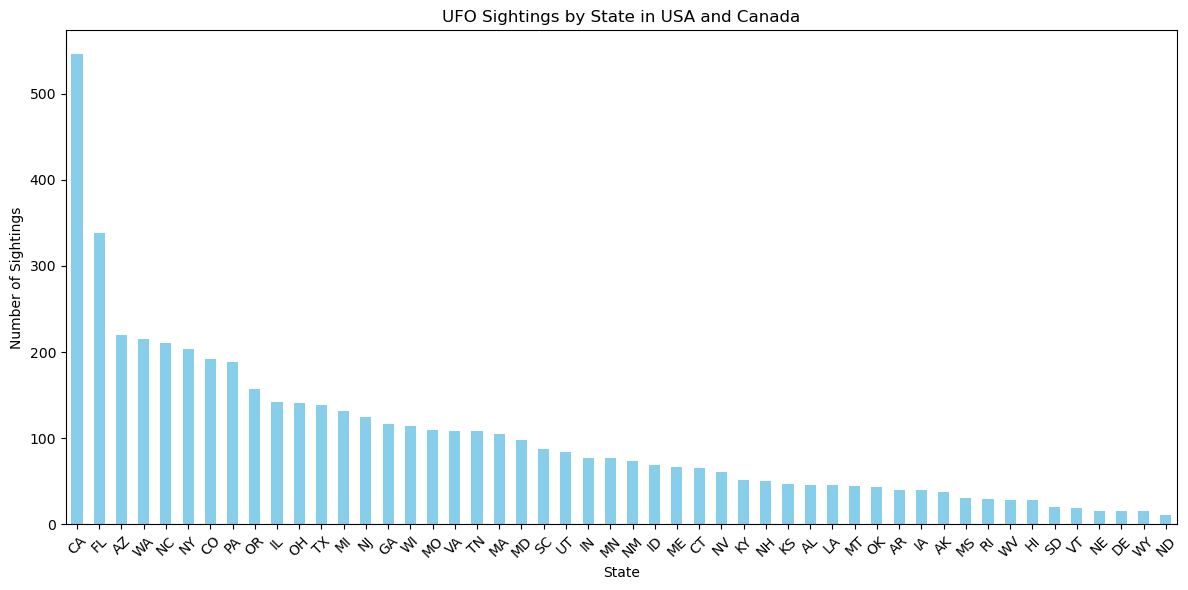

In [3]:
# Filter the data for USA and Canada
usa_and_canada = ufo_df[(ufo_df['Country'] == 'USA') | (ufo_df['Country'] == 'Canada')]

# Count the occurrences of sightings in each state
state_counts = usa_and_canada['State'].value_counts()

# Create a bar graph
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar', color='skyblue')
plt.title('UFO Sightings by State in USA and Canada')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [4]:
# Filter the data for USA and Canada
usa_and_canada = ufo_df[(ufo_df['Country'] == 'USA') | (ufo_df['Country'] == 'Canada')]

# Create a map centered around North America
m = folium.Map(location=[50, -100], zoom_start=4)

# Add markers for each UFO sighting
for index, row in usa_and_canada.iterrows():
    lat, lng = row['lat'], row['lng']
    date, time = row['Date'], row['Time']
    city, state = row['City'], row['State']
    shape, summary = row['Shape'], row['Summary']
    country = row['Country']
    
    # Create a popup message with sighting details
    popup_text = f"<b>{country} - {state}</b><br>Date: {date}<br>Time: {time}<br>City: {city}<br>Shape: {shape}<br>Summary: {summary}"
    
    # Add a marker for each sighting
    folium.Marker(location=[lat, lng], popup=popup_text, icon=folium.Icon(color='blue')).add_to(m)

# Save the map to an HTML file or display it in a Jupyter Notebook
m.save('ufo_sightings_map.html')

In [5]:
m.save('ufo_sightings_map.html')

In [5]:
california_sightings = ufo_df[ufo_df['State'] == 'CA']

# Create a map centered around California
california_map = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Add markers for each sighting in California
for index, row in california_sightings.iterrows():
    lat, lng = row['lat'], row['lng']
    summary = row['Summary']
    marker = folium.Marker([lat, lng], tooltip=summary)
    marker.add_to(california_map)

# Display the map
california_map.save('california_ufo_sightings_map.html')

In [6]:
california_map.save('california_ufo_sightings_map.html')

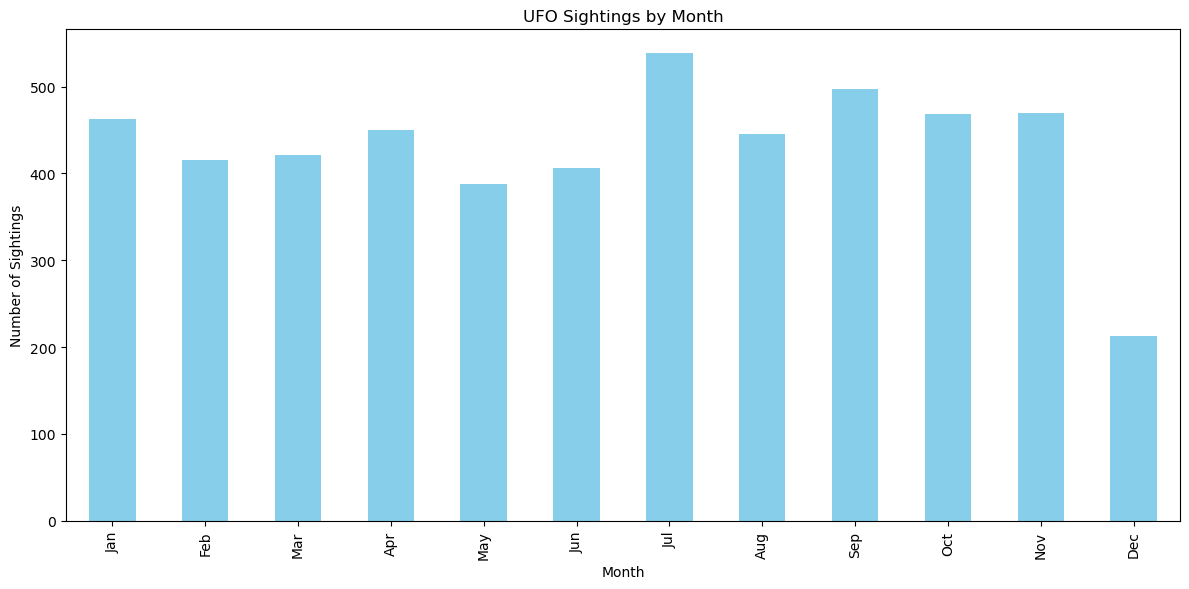

In [16]:
ufo_df = pd.read_csv('UFO_csv.csv', encoding='latin-1')

# Convert 'Date / Time' to datetime format
ufo_df['Date'] = pd.to_datetime(ufo_df['Date'])

# Extract the month from the 'Date / Time' column
ufo_df['Month'] = ufo_df['Date'].dt.month

# Group by month and count the sightings
monthly_sightings = ufo_df.groupby('Month')['Date'].count()

# Create a bar graph
plt.figure(figsize=(12, 6))
monthly_sightings.plot(kind='bar', color='skyblue')
plt.title('UFO Sightings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()

# Show the plot
plt.show()

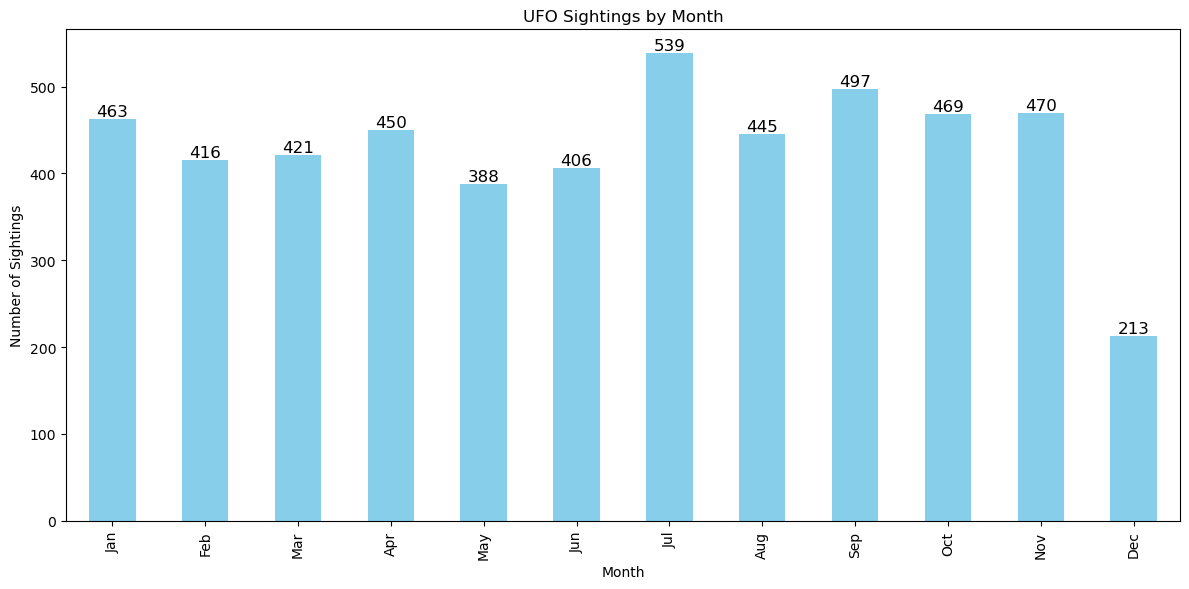

In [17]:
ufo_df = pd.read_csv('UFO_csv.csv', encoding='latin-1')

# Convert 'Date / Time' to datetime format
ufo_df['Date'] = pd.to_datetime(ufo_df['Date'])

# Extract the month from the 'Date / Time' column
ufo_df['Month'] = ufo_df['Date'].dt.month

# Group by month and count the sightings
monthly_sightings = ufo_df.groupby('Month')['Date'].count()

# Create a bar graph
plt.figure(figsize=(12, 6))
ax = monthly_sightings.plot(kind='bar', color='skyblue')
plt.title('UFO Sightings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()

# Annotate each bar with its count
for i, count in enumerate(monthly_sightings):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()